In [33]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

from testCases_v2 import *
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

### Some helper functions
1. `sigmoid`
2. `plot_decision_boundary()` 

In [3]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    return 1/(1+np.exp(-x))
    


In [40]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [51]:
def load_planar_dataset():
    
    np.random.seed(1)
    
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [8]:
def load_extra_datasets():  
    N = 200
    
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

### generate and plot the dataset
The dataset when visualized looks like a flower with red(y=0) and blue(y=1) points.

In [52]:
X, Y = load_planar_dataset()

In [45]:
X.shape, type(X), Y.shape

((400, 2), numpy.ndarray, (400, 1))

In [23]:
Y[:,195:205]

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]], dtype=uint8)

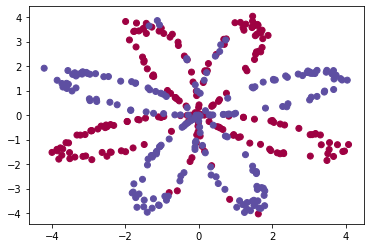

In [54]:
#vizualize the data points (when transposed)
plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)

#When X, Y are not transposed
#plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)

We have a numpy-array (matrix) X that contains your features `(x1, x2)` - a numpy-array (vector) Y that contains the labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

**Exercise**:
- How many training examples do you have? 
- In addition, what is the shape of the variables X and Y?

Hint: How do you get the shape of a numpy array? 

In [24]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape

### CODE HERE ###
# training set size
m = 
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


Expected Output:

```m = 400;
**shape of X**	(2, 400)
**shape of Y**	(1, 400)```

### Train a Logistic Regression Binary Classifier 

In [56]:
#instantate the model
b_clf = sklearn.linear_model.LogisticRegressionCV()

### CODE HERE(1 line) ###
# train the model with proper dimension
b_clf.fit(X.T, Y.T)

/home/tapasi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/tmp/ipykernel_792166/3258595554.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


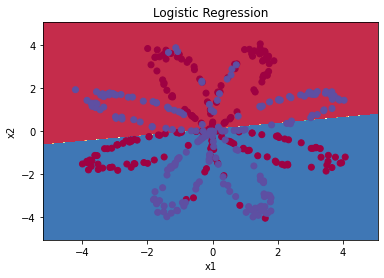

In [57]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: b_clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = b_clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Expected Output is `47% `

Q. Why so poor accuracy?
The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better.

### Train a NN model
The general methodology to build a Neural Network is to: 
1. Define the neural network structure ( # of input units, # of hidden units, etc). 
2. Initialize the model's parameters 
3. Loop: 
    - Implement forward propagation 
    - Compute loss 
    - Implement backward propagation to get the gradients 
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once we've built `nn_model()` and learnt the right parameters, we can make predictions on new data.

### 4.1 - Defining the neural network structure
**Exercise:**
Define three variables: 
- `n_x`: the size of the input layer 
- `n_h`: the size of the hidden layer (set this to 4) 
- `n_y`: the size of the output layer

Hint: Use shapes of X and Y to find `n_x` and `n_y`. Also, hard code the hidden layer size to be 4.

In [ ]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x =  # size of input layer
    n_h = 
    n_y =  # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [59]:
X_assess, Y_assess = layer_sizes_test_case()

(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Expected Output:**
```
n_x = 5
n_h = 4
n_y = 2```

### 4.2 - Initialize the model's parameters
***Exercise***: Implement the function `initialize_parameters()`.

Instructions:

- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [62]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
   
   ### START CODE HERE ### (≈ 4 lines of code)
    W1 = 
    b1 =
    W2 = 
    b2 = 
    ### END CODE HERE ###
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [63]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[0.]]


**Expected output:**
```
W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[ 0.]]
```

### 4.3 - The Loop
**Question: Implement `forward_propagation()`**
Instructions:

- Look above at the mathematical representation of your classifier.
- Use the function `sigmoid()` at the output layer. 
- Use the function `np.tanh()` in the hidden units. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using parameters`[".."]`.
    2. Implement Forward Propagation. Compute  $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = 
    b1 = 
    W2 = 
    b2 = 
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 =  # n_h*m
    A1 = 
    Z2 =  # n_y*m
    A2 = 
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Expected Output:

0.262818640198 0.091999045227 -1.30766601287 0.212877681719
